## Build a simple trading strategy 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#import MS stock data, add 2 columns 'MA10' and 'MA50'
ms = pd.read_csv('../data/microsoft.csv',index_col='Date')
ms['Close1'] = ms['Close'].shift(-1)
ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA50'] = ms['Close'].rolling(50).mean()
ms = ms.dropna()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,Close1,MA10,MA50
Date,,,,,,,,,
2018-01-29,95.139999,95.449997,93.720001,93.919998,93.480873,31569900,92.739998,91.423,86.3292
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,95.010002,91.862,86.5244
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,94.260002,92.349,86.7606
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,91.779999,92.765,86.9978
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,88.000000,92.943,87.1828


In [32]:
#Add column 'Shares'.Shares = 1 if MA10>MA50, otherwise Shares = 0.
ms['Shares'] = [1 if ms.loc[i,'MA10'] > ms.loc[i,'MA50'] else 0 for i in ms.index ]
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,Close1,MA10,MA50,Shares
Date,,,,,,,,,,
2018-01-29,95.139999,95.449997,93.720001,93.919998,93.480873,31569900,92.739998,91.423,86.3292,1
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,95.010002,91.862,86.5244,1
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,94.260002,92.349,86.7606,1
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,91.779999,92.765,86.9978,1
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,88.000000,92.943,87.1828,1


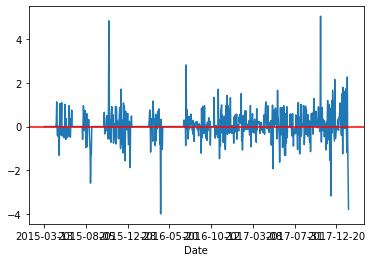

In [43]:
#Add column 'Profit'. if Shares = 1 => Profit = Tomorrow's close price - Today's close price
ms['Profit'] = [ms.loc[i,'Close1'] - ms.loc[i, 'Close']if ms.loc[i,'Shares'] == 1 else 0 for i in ms.index]
ms.tail()
ms['Profit'].plot()
plt.axhline(y=0,color='red')